In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from yellowbrick.regressor import residuals_plot
import lightgbm as lgb
import xgboost as xgb

C:\Users\User\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\User\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\User\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
data = pd.read_csv("yearly_salaries_by_gender_2007222.csv")
data.head()
data.shape

(288, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   time_period       288 non-null    int64  
 1   time_identifier   288 non-null    object 
 2   geographic_level  288 non-null    object 
 3   country_code      288 non-null    object 
 4   country_name      288 non-null    object 
 5   age_group         288 non-null    object 
 6   graduate_type     288 non-null    object 
 7   gender            288 non-null    object 
 8   median            288 non-null    int64  
 9   median_real       288 non-null    int64  
 10  accuracy_flag     0 non-null      float64
dtypes: float64(1), int64(3), object(7)
memory usage: 24.9+ KB


In [5]:
# To drop irrelevant columns
cols_to_remove = ['time_identifier', 'geographic_level',
          'country_code', 'country_name', 'accuracy_flag', 'median_real']
data = data.drop(columns = cols_to_remove)

In [6]:
# To create a copy of the dataframe
data_copy = data.copy()

# Label Encoding
label_encoder = LabelEncoder() # Create instance of label encoder
categorical_columns = ['age_group', 'graduate_type', 'gender'] 

# To apply encoding to categorical columns
for column in categorical_columns:
    data_copy[column] = label_encoder.fit_transform(data[column])
data_copy


,time_period,age_group,graduate_type,gender,median
0,2007,1,0,2,23000
1,2007,1,1,2,17000
2,2007,1,2,2,26500
3,2007,0,0,2,30000
4,2007,0,1,2,20000
...,...,...,...,...,...
283,2022,1,1,1,25000
284,2022,1,2,1,34000
285,2022,1,0,0,28500
286,2022,1,1,0,22500


array([[<AxesSubplot:title={'center':'time_period'}>,
        <AxesSubplot:title={'center':'age_group'}>],
       [<AxesSubplot:title={'center':'graduate_type'}>,
        <AxesSubplot:title={'center':'gender'}>],
       [<AxesSubplot:title={'center':'median'}>, <AxesSubplot:>]],
      dtype=object)

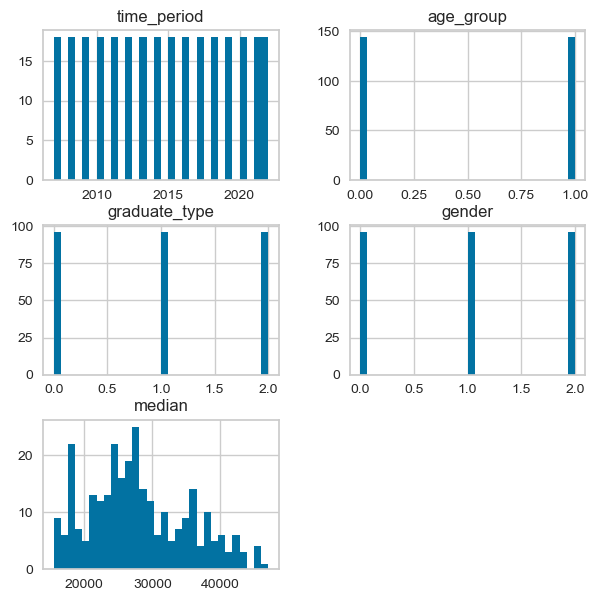

In [7]:
# To find the distribution of features
data_copy.hist(bins=30, figsize=(7,7))

In [8]:
# To Separate the target column from the independent variables
X = data_copy.drop('median', axis=1)
y = data_copy['median']

# To calculate the VIF value
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# To check for multicollinearit
print(vif)

        Variable       VIF
0    time_period  4.999895
1      age_group  1.999990
2  graduate_type  2.499980
3         gender  2.499980


Random Forest Regressor Model:
Mean Absolute Error: 770.0862
Mean Squared Error: 996734.0517
Root Mean Squared Error: 998.3657
R-squared (R2) Score: 0.9803

LightGBM Regressor Model:
Mean Absolute Error: 672.6318
Mean Squared Error: 861385.1766
Root Mean Squared Error: 928.1084
R-squared (R2) Score: 0.9830

XGBoost Regressor Model:
Mean Absolute Error: 580.5301
Mean Squared Error: 562486.0783
Root Mean Squared Error: 749.9907
R-squared (R2) Score: 0.9889



C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot

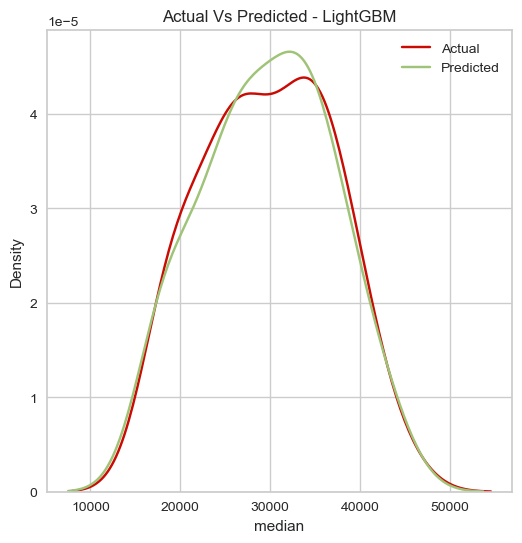

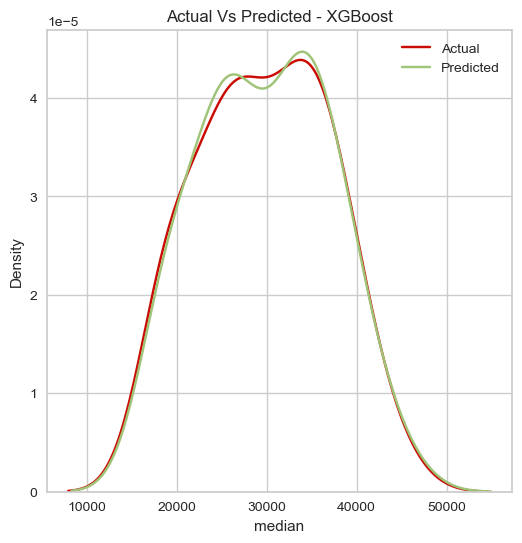

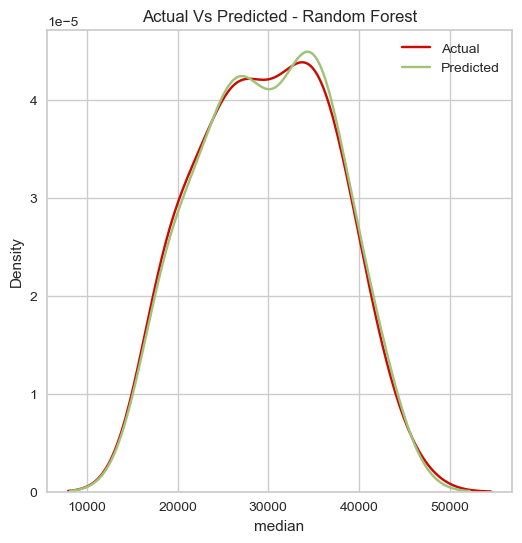

In [10]:
# To split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# To create an instance of Random Forest Regressor Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
# To fit the training data on the model and predict the output on test data
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# To create an instance of LightGBM Regressor Model
lgbm_model = lgb.LGBMRegressor(random_state=42)
# To fit the training data on the model and predict the output on test data
lgbm_model.fit(X_train, y_train)
lgbm_pred = lgbm_model.predict(X_test)

# To create an instance of XGBoost Regressor
xgb_model = xgb.XGBRegressor(random_state=42)
# To fit the training data on the model and predict the output on test data
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# To evaluate the models
def evaluate_model(name, predictions):
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    r2 = r2_score(y_test, predictions)
    print(f"{name} Model:")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")
    print(f"R-squared (R2) Score: {r2:.4f}")
    print("")
    
# To call the evaluate_model function    
evaluate_model("Random Forest Regressor", rf_pred)
evaluate_model("LightGBM Regressor", lgbm_pred)
evaluate_model("XGBoost Regressor", xgb_pred)

# To plot the Actual vs Predicted Graph
plt.figure(figsize=(6,6))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual")
sns.distplot(lgbm_pred, hist=False, color="g", label="Predicted", ax=ax1)
plt.title("Actual Vs Predicted - LightGBM")
plt.legend()

plt.figure(figsize=(6,6))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual")
sns.distplot(xgb_pred, hist=False, color="g", label="Predicted", ax=ax1)
plt.title("Actual Vs Predicted - XGBoost")
plt.legend()

plt.figure(figsize=(6,6))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual")
sns.distplot(rf_pred, hist=False, color="g", label="Predicted", ax=ax1)
plt.title("Actual Vs Predicted - Random Forest")
plt.legend()
